In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,date,timedelta

In [2]:
#导入数据
path = 'datas/%s-作業実績表-李川.xls'
nowDate = datetime.now()
nowYearMonth = '{:02d}'.format(nowDate.year) + '-' + '{:02d}'.format(nowDate.month)
dateRange = pd.date_range('2019-06', '2020-06', freq='M')

dataArrays = []

for dt in dateRange:
    pth = str(dt.year)+'-'
    if dt.month < 10:
        pth += '0' + str(dt.month)
    else :
        pth += str(dt.month)
    pth = path % pth

    monthWkTime = pd.read_excel(pth)
    
    dataArrays.append(monthWkTime[[monthWkTime.columns[0],monthWkTime.columns[2],monthWkTime.columns[3]]]
                      .dropna()[1:])

datas = pd.concat(dataArrays,ignore_index=True)
# datas.rename(columns={'作業実績表':'date','Unnamed: 2':'startwork','Unnamed: 3':'endwork'},inplace=True)
datas

,作業実績表,Unnamed: 2,Unnamed: 3
0,2019-06-03 00:00:00,09:43:00,19:47:00
1,2019-06-04 00:00:00,09:43:00,19:07:00
2,2019-06-05 00:00:00,09:43:00,19:50:00
3,2019-06-06 00:00:00,09:40:00,19:49:00
4,2019-06-07 00:00:00,09:42:00,19:49:00
...,...,...,...
233,2020-05-25 00:00:00,09:27:00,19:45:00
234,2020-05-26 00:00:00,09:26:00,18:33:00
235,2020-05-27 00:00:00,09:25:00,18:30:00
236,2020-05-28 00:00:00,09:31:00,19:30:00


In [3]:
columnNames = {'作業実績表':'date','Unnamed: 2':'starttime', 'Unnamed: 3':'endtime'}
datas = datas.rename(columns = columnNames)

def substrac_two_time(dateT):
    return datetime.combine(date.min,dateT.endtime) - datetime.combine(date.min,dateT.starttime) - timedelta(hours=1)

datas['worktime'] = datas.apply(substrac_two_time,axis=1)
datas[:10]

,date,starttime,endtime,worktime
0,2019-06-03 00:00:00,09:43:00,19:47:00,09:04:00
1,2019-06-04 00:00:00,09:43:00,19:07:00,08:24:00
2,2019-06-05 00:00:00,09:43:00,19:50:00,09:07:00
3,2019-06-06 00:00:00,09:40:00,19:49:00,09:09:00
4,2019-06-07 00:00:00,09:42:00,19:49:00,09:07:00
5,2019-06-10 00:00:00,09:45:00,19:37:00,08:52:00
6,2019-06-11 00:00:00,09:40:00,20:29:00,09:49:00
7,2019-06-12 00:00:00,09:45:00,20:30:00,09:45:00
8,2019-06-13 00:00:00,09:45:00,19:30:00,08:45:00
9,2019-06-14 00:00:00,09:47:00,19:13:00,08:26:00


array([ 9.07, 26.86, 33.17, 37.09, 45.85, 46.2 , 43.77, 42.97, 43.41,
       44.37, 43.61, 43.54, 43.16, 42.66, 44.99, 42.37, 40.17, 41.  ,
       42.03, 42.11, 44.93, 41.08, 38.58, 41.02, 39.01, 41.68, 44.05,
       43.49, 44.7 , 44.17, 42.34, 34.01, 31.97, 32.36, 31.94, 40.62,
       42.63, 41.11, 39.52, 40.57, 41.19, 41.85, 42.7 , 41.4 , 40.5 ,
       39.9 , 41.87, 41.54, 38.27, 34.71, 34.88, 35.35, 36.7 ])

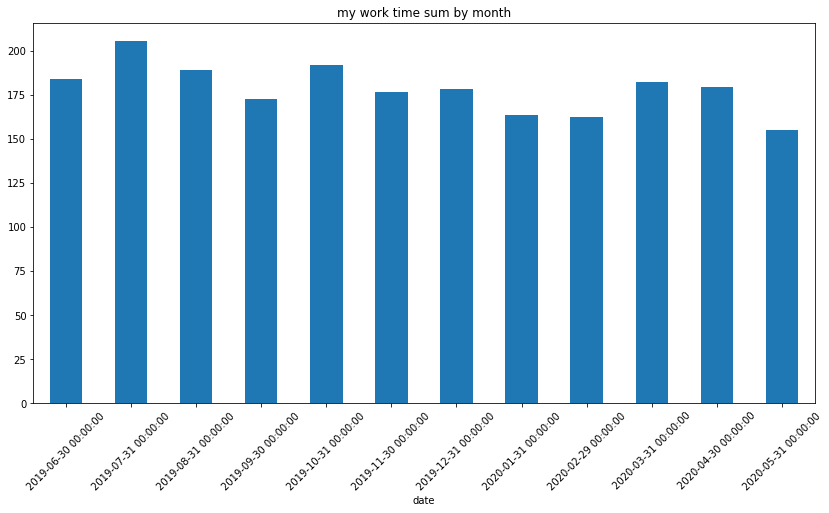

In [6]:
#total of work time group by month
def formatXaxisDateBarGraphy(df,ax,xlabelstr='',ylabelstr=''):
    xtickArr = list(df.index.strftime('%Y-%m-%d'))
    ax.set_xticklabels(xtickArr,rotation=45) # beautiful the xlabels
    ax.set_xlabel('month of the year' if not xlabelstr else xlabelstr)
    ax.set_ylabel('hours' if not ylabelstr else ylabelstr)
    #set number to the head of the bar
    for p in ax.patches:
        ax.annotate(str(format(p.get_height(),'.1f')),(p.get_x() * 1.01, p.get_height() * 1.01))
        
df_grpM = datas[:] #copy
# df_grpM = df_grpM.set_index('date')
df_gpM_sumW = df_grpM.resample('M',on='date').sum()
# df_gpM_sumW.worktime.dtype  #timedelta
df_gpM_sumW.worktime = df_gpM_sumW.worktime / pd.Timedelta('1 hour')
df_gpM_sumW['quaterMean'] = df_gpM_sumW['worktime'].rolling(window=3,min_periods=1).mean()
# df_gpM_sumW = df_gpM_sumW.reset_index()

df_gpM_sumW['quaterMean'] = df_gpM_sumW['quaterMean'].round(2)
df_gpM_sumW['worktime'] = df_gpM_sumW['worktime'].round(2)
# df_gpM_sumW.to_json(r'df_gpM_sumW.json')

ax_sumW = df_gpM_sumW['worktime'].plot(kind='bar',figsize=(14,7),title='my work time sum by month')
ax_sumW = ax_sumW.tick_params(axis='x',rotation=45)

# formatXaxisDateBarGraphy(df_gpM_sumW, ax_sumW)
# ax_sumW.get_figure().savefig('workTimeSumByMonth.png')


#sum worktime by week
df_gpM_sumW_week = df_grpM.resample('W-MON',on='date').sum()
df_gpM_sumW_week.worktime = df_gpM_sumW_week.worktime / pd.Timedelta('1 hour')
# df_gpM_sumW_week.month_worktime = df_grpM.resample('M',on='date').sum()
# df_gpM_sumW_week.month_worktime = df_gpM_sumW_week.month_worktime / pd.Timedelta('1 hour')
df_gpM_sumW_week['mean_by_month'] = df_gpM_sumW_week['worktime'].rolling(window=4,min_periods=1).mean()
df_gpM_sumW_week['mean_by_month'].round(2).values
# ax_sumW_week = df_gpM_sumW_week.plot(kind='bar',figsize=(15,10),title='my work time sum by week')
# df_gpM_sumW_week.month_worktime.plot(kind='line',ax=ax_sumW_week)

# formatXaxisDateBarGraphy(df_gpM_sumW_week, ax_sumW_week,'week of day')
# ax_sumW_week.get_figure().savefig('workTimeSumByWeek.png')

,max,min
date,,
2019-06-30,10.90,7.92
2019-07-31,12.53,7.83
2019-08-31,12.13,7.88
2019-09-30,12.37,7.83
2019-10-31,11.72,8.27
2019-11-30,11.75,8.30
2019-12-31,11.85,7.78
2020-01-31,10.43,8.13
2020-02-29,12.90,3.82


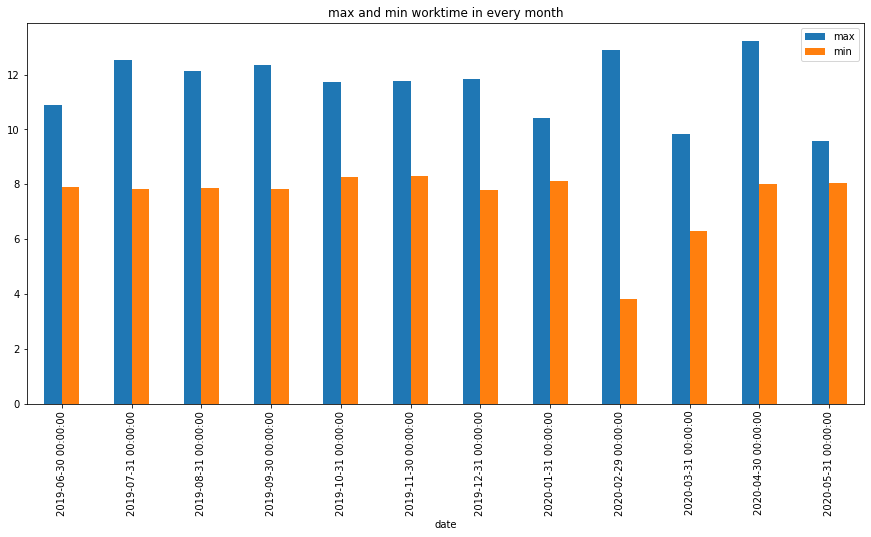

In [8]:
#find the longest shortest of the day in every month
df_max_min_hour = df_grpM.resample('M',on='date')['worktime'].agg(['max','min'])
# df_max_min_hour.max = df_max_min_hour.max / pd.Timedelta('1 hour')
df_max_min_hour = df_max_min_hour.apply(lambda x: x / pd.Timedelta('1 hour'))
ax_max_min_hour = df_max_min_hour.plot(kind='bar',figsize=(15,7),title='max and min worktime in every month')

df_max_min_hour.round(2)
#set the xlabes
# formatXaxisDateBarGraphy(df_max_min_hour,ax_max_min_hourmin_hour)
# ax_max_min_hour.get_figure().savefig('workTimeMaxAndMinInEveryMonth.png')

,starttime,endtime,stimeRollingByMonth,etimeRollingByMonth
date,,,,
2019-06-03,9.72,19.78,9.72,19.78
2019-06-04,9.72,19.12,9.72,19.45
2019-06-05,9.72,19.83,9.72,19.58
2019-06-06,9.67,19.82,9.70,19.64
2019-06-07,9.70,19.82,9.70,19.67
...,...,...,...,...
2020-05-25,9.45,19.75,9.41,18.98
2020-05-26,9.43,18.55,9.41,18.98
2020-05-27,9.42,18.50,9.41,18.98


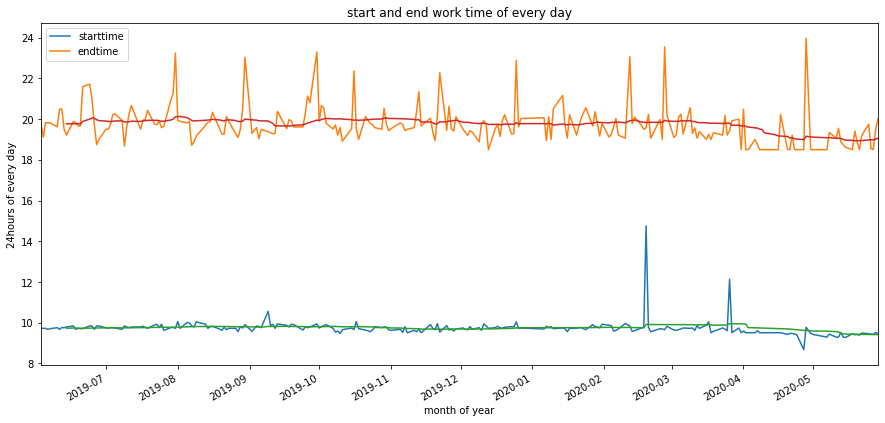

In [20]:
#show starttime endtime in one graphy by every day
df_start_end_byday = datas[['date','starttime','endtime']]
df_start_end_byday = df_start_end_byday.set_index('date')
df_start_end_byday['starttime'] = df_start_end_byday['starttime'].apply(lambda x:x.hour + x.minute/60.0)
df_start_end_byday['endtime'] = df_start_end_byday['endtime'].apply(lambda x:x.hour + x.minute/60.0)
ax_start_end_day = df_start_end_byday.plot(kind='line',figsize=(15,7),title='start and end work time of every day')
df_start_end_byday.starttime.rolling(30, min_periods=10).mean().plot()
df_start_end_byday.endtime.rolling(30, min_periods=10).mean().plot()

ax_start_end_day.set_xlabel('month of year')
ax_start_end_day.set_ylabel('24hours of every day')
ax_start_end_day.get_figure().savefig('startAndEndWorkTime.png')

df_start_end_byday['stimeRollingByMonth'] = df_start_end_byday.starttime.rolling(window=30,min_periods=1).mean()
df_start_end_byday['etimeRollingByMonth'] = df_start_end_byday.endtime.rolling(window=30,min_periods=1).mean()
df_start_end_byday = df_start_end_byday.round(2)
df_start_end_byday.to_csv('start&EndTimeByDay.csv')
df_start_end_byday